# LAB TASK 7


## Question no 1

When using K-means clustering, it's generally a good practice to split the data into training and testing sets before running the algorithm. The reason for doing this is to avoid overfitting the model to the training data and to evaluate its performance on unseen data.

Overall, splitting the data into training and testing sets is an important step when using K-means clustering to ensure that the model is accurate and can generalize well to new data.




## Question no 2

We need to scale the features before performing K-means clustering for several reasons:

### 1: To normalize the data:
 K-means clustering is a distance-based algorithm that calculates the distances between data points. If the features are not on the same scale, then the clustering algorithm will be biased towards the features with larger scales. Scaling the features ensures that they are on the same scale and have equal importance in the clustering process.

### 2: To improve convergence:
Scaling the features can improve the convergence of the K-means algorithm. This is because the algorithm works by minimizing the sum of squared distances between the data points and their assigned centroids. If the features are not scaled, then the distances between data points will be biased towards the features with larger scales. This can cause the algorithm to converge slowly or to get stuck in local minima.

### 3: To improve cluster quality:
 Scaling the features can improve the quality of the clusters produced by the algorithm. This is because it can help to reduce the variability of the features and make it easier for the algorithm to identify meaningful patterns in the data. In particular, it can help to reduce the influence of outliers and make the clusters more compact and well-separated.
Overall, scaling the features is an important preprocessing step when performing K-means clustering. It can help to ensure that the algorithm produces accurate and meaningful clusters that can be used for further analysis.

# LAB TASK


In [5]:
import pandas as pd

data = pd.read_csv("Cust_Segmentation.csv")

print(data.head())

   Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted Address  DebtIncomeRatio  
0        0.0  NBA001              6.3  
1        0.0  NBA021             12.8  
2        1.0  NBA013             20.9  
3        0.0  NBA009              6.3  
4        0.0  NBA008              7.2  


In [6]:
duplicates = data.duplicated()
print("Number of duplicates : ",duplicates.sum())

#Removing 

data = data.drop_duplicates()

#Checking For missing values 

missing = data.isnull().sum()
print("Number of Missing values : \n",missing)

#Removing Null data

data = data.dropna()

#Reseting Index
data = data.reset_index(drop=True)


print(data.head())



Number of duplicates :  0
Number of Missing values : 
 Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
Address              0
DebtIncomeRatio      0
dtype: int64
   Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted Address  DebtIncomeRatio  
0        0.0  NBA001              6.3  
1        0.0  NBA021             12.8  
2        1.0  NBA013             20.9  
3        0.0  NBA009              6.3  
4        0.0  NBA008              7.2  


In [7]:
data['Address'] = pd.to_numeric(data['Address'],errors = 'coerce')

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

features = data.iloc[:,1:]
scaler = StandardScaler()

Scaled_data = scaler.fit_transform(data)
Scaled_data = pd.DataFrame(Scaled_data, columns=data.columns)

print(Scaled_data.head())

   Customer Id       Age       Edu  Years Employed    Income  Card Debt  \
0    -1.766243  0.768304  0.298793       -0.359007 -0.723102  -0.675699   
1    -1.762130  1.519090 -0.779325        2.647029  1.478707   1.431421   
2    -1.758018 -0.232744  0.298793        0.242201  0.309845   2.154119   
3    -1.753905 -0.733267  0.298793       -0.659610 -0.723102  -0.412427   
4    -1.749792  1.519090 -0.779325        3.398538  5.637681   3.665215   

   Other Debt  Defaulted  Address  DebtIncomeRatio  
0   -0.604284  -0.594950      NaN        -0.580528  
1    1.570620  -0.594950      NaN         0.372222  
2    0.835201   1.680814      NaN         1.559495  
3   -0.773833  -0.594950      NaN        -0.580528  
4    1.780653  -0.594950      NaN        -0.448609  


f:\ANACONDA\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
f:\ANACONDA\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
f:\ANACONDA\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


In [11]:
X = Scaled_data[['Income','Years Employed']]

f:\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


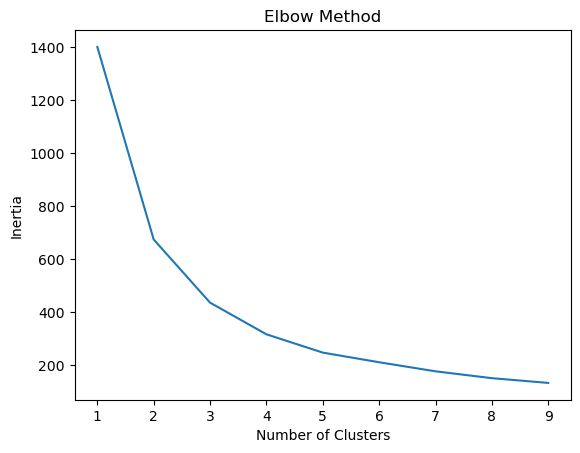

In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Fit the KMeans model with various k values
inertias = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 10), inertias)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

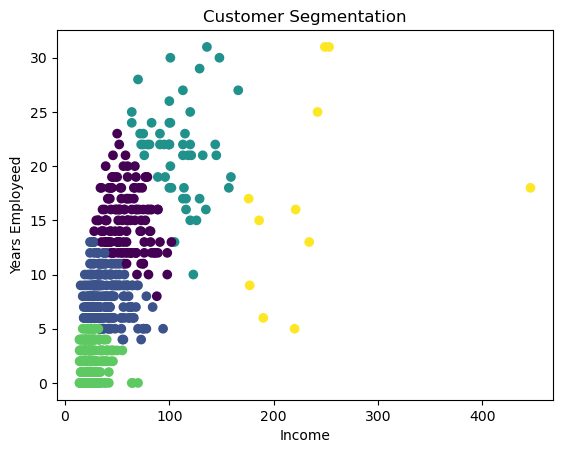

In [22]:
# Fit K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
data['cluster']=kmeans.labels_

# Visualize the clusters
plt.scatter(data['Income'], data['Years Employed'], c=data['cluster'], cmap='viridis')
plt.xlabel('Income')
plt.ylabel('Years Employeed')
plt.title('Customer Segmentation')
plt.show()